In [11]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import torchaudio
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Data Recovery

In [12]:
emotion_mapping = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

data = []

dataset_path = Path("../../dataset")

for path in tqdm(dataset_path.glob("**/*.wav")):
    name = str(path).split('\\')[-1].split('.')[0]
    label_code = name.split('-')[2]  # Emotional Code Extraction
    emotion = emotion_mapping.get(label_code, "unknown")

    try:
        s = torchaudio.load(path)
        # File added to "data" in dictionary format
        data.append({
            "name": name,
            "path": str(path),
            "emotion": emotion
        })
    except Exception as e:
        pass


1440it [00:04, 296.56it/s]


In [13]:
df = pd.DataFrame(data)
df.head()

,name,path,emotion
0,03-01-01-01-01-01-01,..\..\dataset\Actor_01\03-01-01-01-01-01-01.wav,neutral
1,03-01-01-01-01-02-01,..\..\dataset\Actor_01\03-01-01-01-01-02-01.wav,neutral
2,03-01-01-01-02-01-01,..\..\dataset\Actor_01\03-01-01-01-02-01-01.wav,neutral
3,03-01-01-01-02-02-01,..\..\dataset\Actor_01\03-01-01-01-02-02-01.wav,neutral
4,03-01-02-01-01-01-01,..\..\dataset\Actor_01\03-01-02-01-01-01-01.wav,calm


## Data cleaning and mixing

In [14]:
print(f"Number of audio files before cleaning: {len(df)}")

df["status"] = df["path"].apply(lambda path: True if os.path.exists(path) else None)
df = df.dropna(subset=["path"])
df = df.drop("status", axis=1)

print(f"Number of audio files after cleaning: {len(df)}")

# Data mixing
df = df.sample(frac=1)
df = df.reset_index(drop=True)

df.head()

Number of audio files before cleaning: 1440
Number of audio files after cleaning: 1440


,name,path,emotion
0,03-01-03-01-01-01-13,..\..\dataset\Actor_13\03-01-03-01-01-01-13.wav,happy
1,03-01-06-02-01-01-15,..\..\dataset\Actor_15\03-01-06-02-01-01-15.wav,fearful
2,03-01-04-02-01-02-22,..\..\dataset\Actor_22\03-01-04-02-01-02-22.wav,sad
3,03-01-04-01-02-01-02,..\..\dataset\Actor_02\03-01-04-01-02-01-02.wav,sad
4,03-01-07-02-01-02-02,..\..\dataset\Actor_02\03-01-07-02-01-02-02.wav,disgust


## Visualizing data distribution

C:\Users\aubin\AppData\Local\Temp\ipykernel_28984\806197252.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


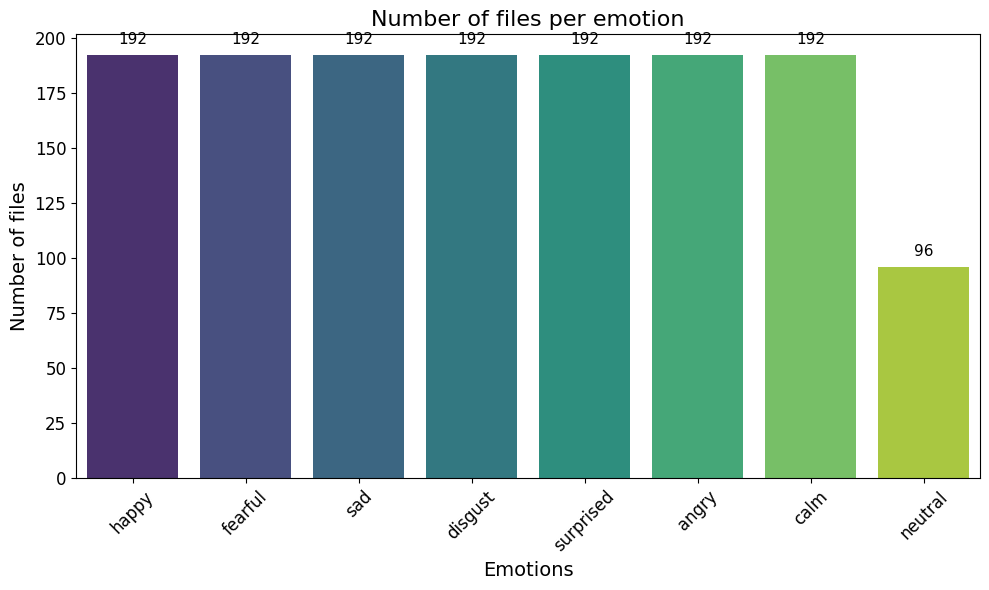

In [15]:
emotion_counts = df["emotion"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")

plt.title("Number of files per emotion", fontsize=16)
plt.xlabel("Emotions", fontsize=14)
plt.ylabel("Number of files", fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(emotion_counts.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


## Split and save training and test sets

In [16]:
save_path = "../../dataset_csv"

train_df, test_df = train_test_split(df, test_size=0.2, random_state=101, stratify=df["emotion"])

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Save
train_df.to_csv(f"{save_path}/train.csv", sep="\t", encoding="utf-8", index=False)
test_df.to_csv(f"{save_path}/test.csv", sep="\t", encoding="utf-8", index=False)

print(train_df.shape)
print(test_df.shape)

(1152, 3)
(288, 3)
